<a href="https://colab.research.google.com/github/Shreyabansal3112/image-basics/blob/main/histpgram_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 # Import the OpenCV library
import numpy as np # Import Numpy library
import matplotlib.pyplot as plt # Import matplotlib functionality
from google.colab.patches import cv2_imshow

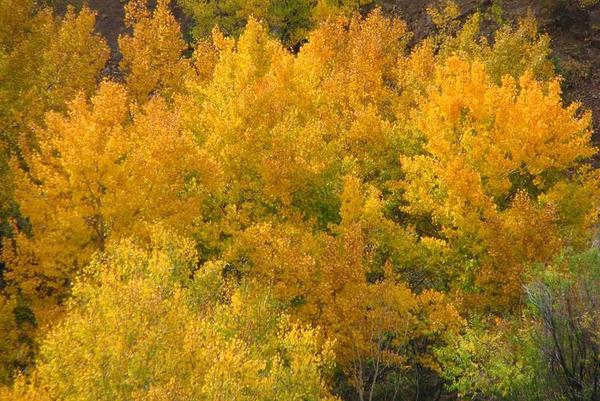

In [ ]:
ima1 = cv2.imread('pic1.jpg')
cv2_imshow(ima1)

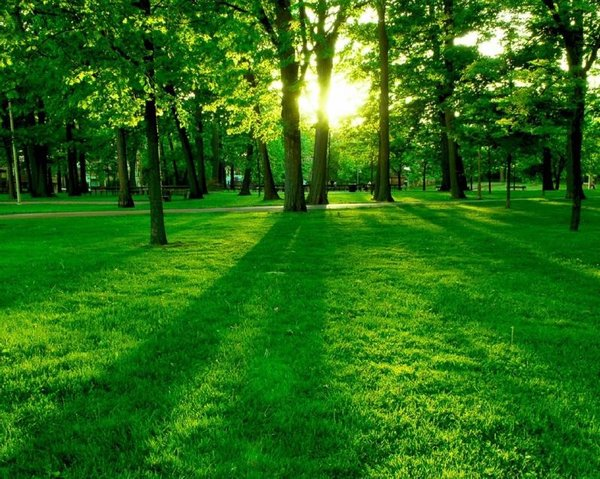

In [ ]:
ima2 = cv2.imread('pic2.jpg')
cv2_imshow(ima2)

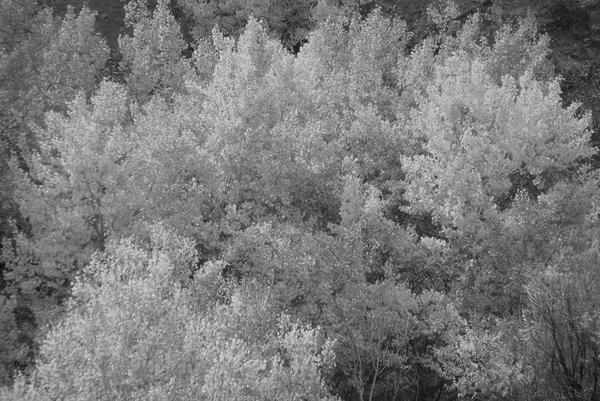

In [ ]:
gray1 = cv2.cvtColor(ima1, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray1)

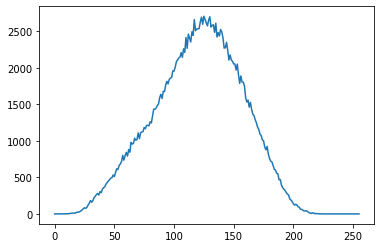

In [ ]:
hist = cv2.calcHist([gray1],[0],None,[256],[0,256])
plt.plot(hist)

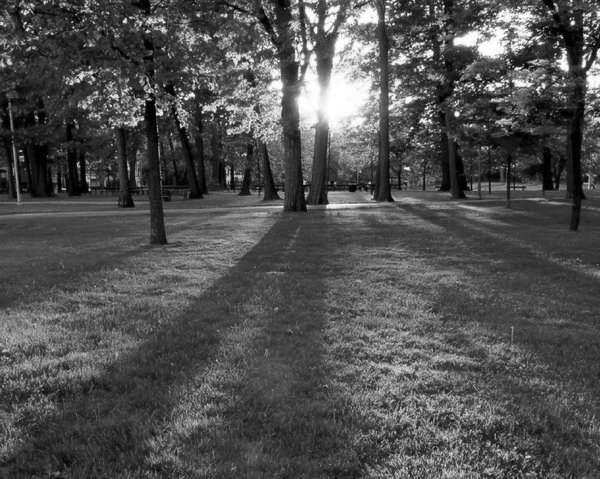

In [ ]:
gray2 = cv2.cvtColor(ima2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray2)

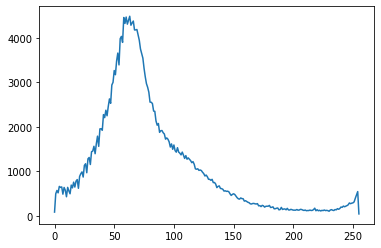

In [ ]:
hist2 = cv2.calcHist([gray2],[0],None,[256],[0,256])
plt.plot(hist2)

In [ ]:
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

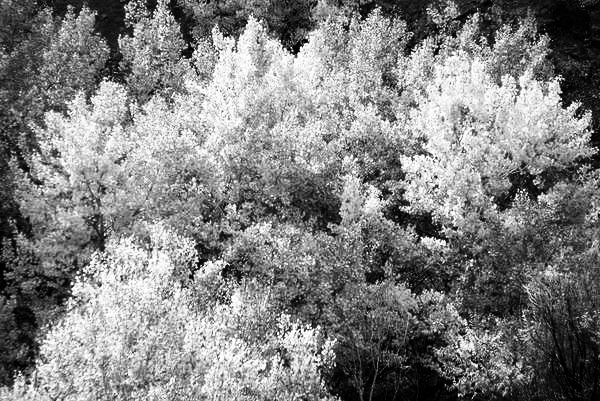

In [ ]:
eqim1 = histeq(gray1)
cv2_imshow(eqim1)

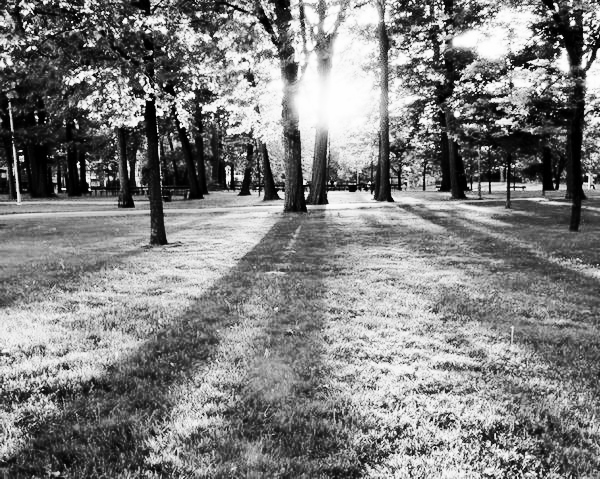

In [ ]:
eqim2 = histeq(gray2)
cv2_imshow(eqim2)

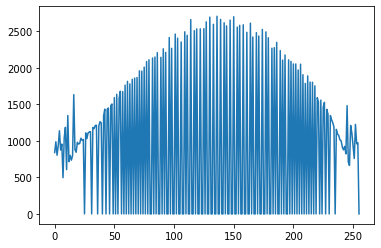

In [ ]:
histeq1 = cv2.calcHist([eqim1],[0],None,[256],[0,256])
plt.plot(histeq1)

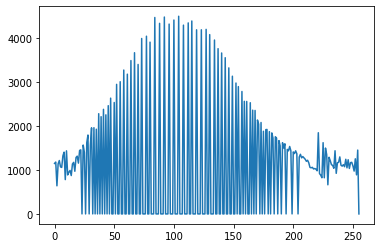

In [ ]:
histeq2 = cv2.calcHist([eqim2],[0],None,[256],[0,256])
plt.plot(histeq2)

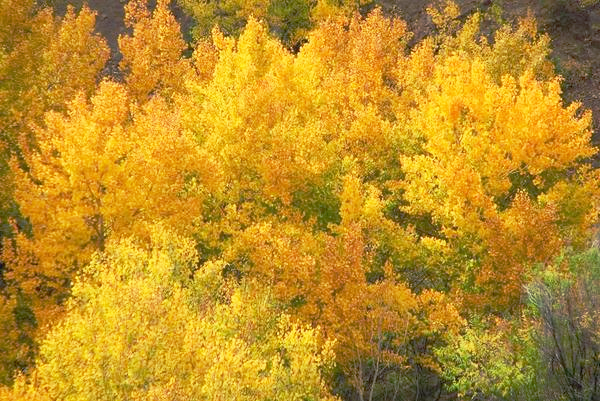

In [ ]:
eqimc1 = histeq(ima1)
cv2_imshow(eqimc1)

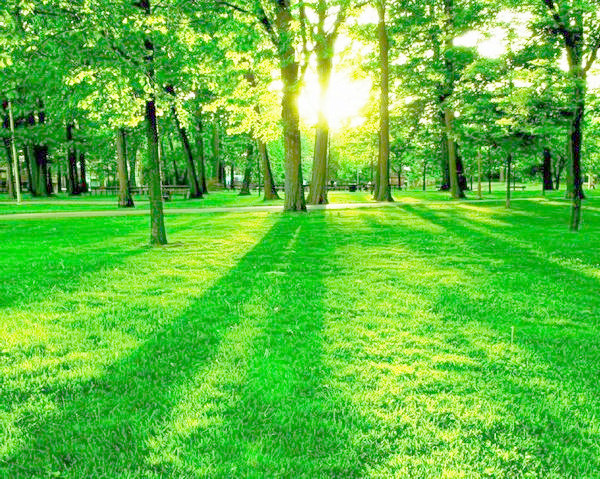

In [ ]:
eqimc2 = histeq(ima2)
cv2_imshow(eqimc2)

In [ ]:
def calculate_cdf(histogram):
    """
    This method calculates the cumulative distribution function
    :param array histogram: The values of the histogram
    :return: normalized_cdf: The normalized cumulative distribution function
    :rtype: array
    """
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf

In [ ]:
def calculate_lookup(src_cdf, ref_cdf):
    """
    This method creates the lookup table
    :param array src_cdf: The cdf for the source image
    :param array ref_cdf: The cdf for the reference image
    :return: lookup_table: The lookup table
    :rtype: array
    """
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table
 

In [ ]:
def match_histograms(src_image, ref_image):
    """
    This method matches the source image histogram to the
    reference signal
    :param image src_image: The original source image
    :param image  ref_image: The reference image
    :return: image_after_matching
    :rtype: image (array)
    """
    # Split the images into the different color channels
    # b means blue, g means green and r means red
    src_b, src_g, src_r = cv2.split(src_image)
    ref_b, ref_g, ref_r = cv2.split(ref_image)
 
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching

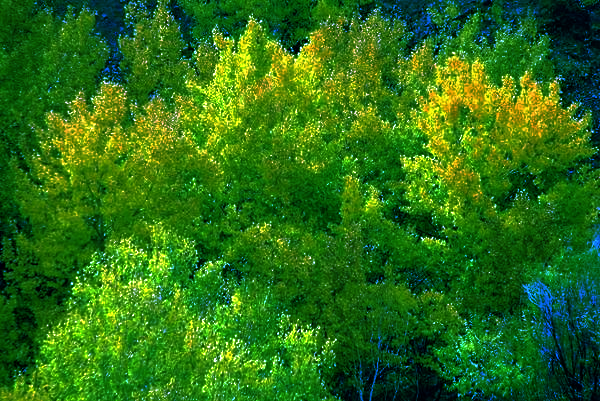

In [ ]:
output_image = match_histograms(ima1, ima2)
cv2_imshow(output_image)

In [ ]:
def mask_image(image, mask):
    """
    This method overlays a mask on top of an image
    :param image image: The color image that you want to mask
    :param image mask: The mask
    :return: masked_image
    :rtype: image (array)
    """
 
    # Split the colors into the different color channels
    blue_color, green_color, red_color = cv2.split(image)
 
    # Resize the mask to be the same size as the source image
    resized_mask = cv2.resize(
        mask, (image.shape[1], image.shape[0]), cv2.INTER_NEAREST)
 
    # Normalize the mask
    normalized_resized_mask = resized_mask / float(255)
 
    # Scale the color values
    blue_color = blue_color * normalized_resized_mask
    blue_color = blue_color.astype(int)
    green_color = green_color * normalized_resized_mask
    green_color = green_color.astype(int)
    red_color = red_color * normalized_resized_mask
    red_color = red_color.astype(int)
 
    # Put the image back together again
    merged_image = cv2.merge([blue_color, green_color, red_color])
    masked_image = cv2.convertScaleAbs(merged_image)
    return masked_image

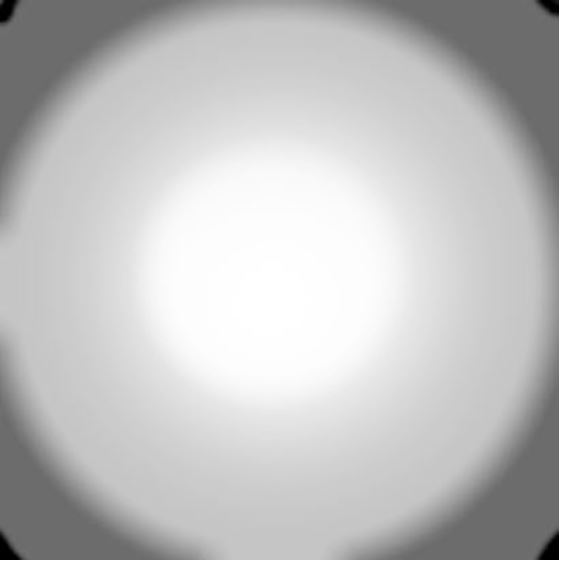

In [ ]:
mask = cv2.imread('mask.jpg')
cv2_imshow(mask)

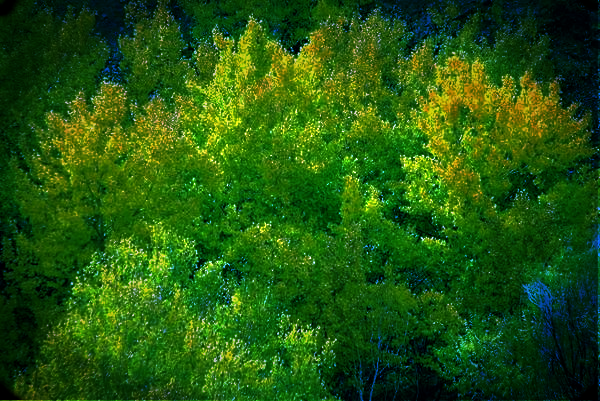

In [ ]:
image_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
masked=mask_image(output_image, image_mask)
cv2_imshow(masked)

In [ ]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
matched = exposure.match_histograms(ima1, ima2, multichannel=True)

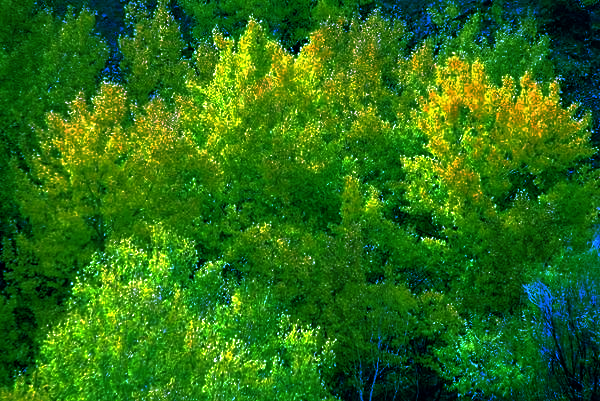

In [ ]:
cv2_imshow(matched)